In [431]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [432]:
data = pd.read_csv('Social_Network_Ads.csv')
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [433]:
X = data.iloc[:,[2,3]].values
y = data.iloc[:,[-1]].values
print(X.shape)

(400, 2)


In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(320, 2) (80, 2)
(320, 1) (80, 1)


In [435]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)

In [436]:
X_train_scaled = (X_train - X_min)/(X_max - X_min)
X_test_scaled = (X_test - X_min)/(X_max - X_min)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(320, 2)
(80, 2)


In [437]:
# print(X_train_scaled.shape, y_train.shape)
X_train_new = np.hstack((np.ones([X_train_scaled.shape[0],1]), X_train_scaled))
X_test_new = np.hstack((np.ones([X_test_scaled.shape[0], 1]), X_test_scaled))
# print(X_train_new.shape,y_train.shape)
print(X_train_new.shape)

(320, 3)


In [438]:
# sigmoid function
g = lambda z : np.exp(z) / (1+np.exp(z))

def predict_prob(X,w):
  z = np.dot(X,w.T) 
  return g(z)

def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >=0.5] =1
  y_hat[y_hat <0.5] =0
  return y_hat

def loss(X,y,w):
  y_hat = predict_prob(X,w)
  l = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
  return -np.mean(l)

def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw.T

def gradient_descent(X,y,lr = 0.02, epochs = 1000):
  w = np.zeros((1, X.shape[1]))
  losses = []
  for i in range(epochs):
    for X_batch, y_batch in batch_generator(X, y):
      dw = grad(X_batch,y_batch,w)
      w -= lr*dw 
    losses.append(loss(X,y,w))
  return losses,w

def batch_generator(X, y, batch_size=32):
  idx = np.arange(X.shape[0])
  np.random.shuffle(idx)

  n_batch = len(idx) // batch_size
  for i in range(n_batch):
    i_start = i * batch_size
    i_stop = min((i+1) * batch_size, len(idx))
    yield X[i_start:i_stop, :], y[i_start:i_stop, :]

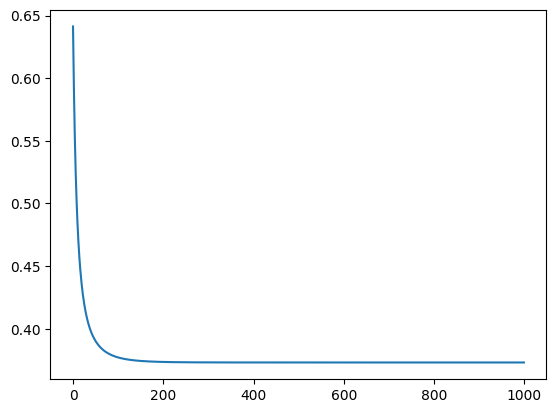

In [439]:
l,w = gradient_descent(X_train_new, y_train)
plt.plot(l)

In [440]:
def accuracy(y_true, y_pred):
    tp = tn = fp = fn = 0 
    for i in range(len(y_true)): 
        if y_true[i] == 1 and y_pred[i] == 1: 
            tp += 1
        elif y_true[i] == 0 and y_pred[i] == 0: 
            tn += 1
        elif y_true[i] == 0 and y_pred[i] == 1: 
            fp += 1
        elif y_true[i] == 1 and y_pred[i] == 0: 
            fn += 1 
    
    acc = (tp+tn)/(tp+tn+fp+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = (2* precision * recall) / (recall + precision)
    print(f"Accuracy = {(acc)}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"f1_score = {f1_score}")
    

In [441]:
y_pred = predict(X_test_new, w)
accuracy(y_test,y_pred)

Accuracy = 0.8625
Precision = 0.9047619047619048
Recall = 0.6785714285714286
f1_score = 0.7755102040816326


In [442]:
from sklearn.metrics import classification_report
y_pred1 = predict(X_test_new,w)
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



ACt4

In [443]:
# def sigmoid(z):
#     z = np.float64(z)
#     return 1/(1 +np.exp(-z))
# class SigmoidLayer:
#   def __init__(self, n_inp, n_out, bias=True):
#     if bias: n_inp += 1
#     w = np.random.randn(n_inp, n_out)
#     self.w = w
#     self.bias = bias
#     self.is_forward = False

#   def forward(self, X):
#     if self.bias:
#       X = np.hstack((np.ones((X.shape[0],1)), X))
#     z = np.dot(X, self.w)
#     a = sigmoid(z)

#     self.is_forward = True
#     self.x = X 
#     self.a = a
#     return a

#   def back_propagation(self, delta):
#     a = self.a
#     dw = np.dot(self.x.T, delta * a * (1.0-a))

#     if self.bias:
#       da = np.dot(delta * a * (1.0-a), self.w.T)[:,1:]
#     else:
#       da = np.dot(delta * a * (1.0-a), self.w.T)
#     return dw,da
    

In [444]:
g = lambda z: 1/(1+np.exp(-z))

class SigmoidLayer:
  def __init__(self, n_inp, n_out, bias=True):
    if bias: n_inp+=1
    w=np.random.randn(n_inp,n_out)
    self.w=w
    self.bias=bias
    self.is_forward=False

  def forward(self,X):
    if self.bias:
      X=np.hstack((np.ones((X.shape[0],1)),X))
    z=np.dot(X,self.w)
    a=g(z)

    self.is_forward = True
    self.x=X
    self.a=a
    return a
  
  def back_propagation(self,delta):
    a=self.a
    dw=np.dot(self.x.T, delta*a*(1.0-a))

    if self.bias:
      da = np.dot(delta*a*(1.0-a), self.w.T)[:,1:]
    else:
      da = np.dot(delta*a*(1.0-a),self.w.T)

    return dw,da



In [445]:
NDIMS = 3
L1 = 32
L2 = 32
L3 = 16
L4 = 8
epochs = 500
lr = 0.02

layers = [SigmoidLayer(NDIMS, L1, bias=False),
          SigmoidLayer(L1,L2),
          SigmoidLayer(L2,L3),
          SigmoidLayer(L3,L4),
          SigmoidLayer(L4,1)]

def predict (X,model):
  for l in model:
    X = l.forward(X)
  return X 

y_pred = predict(X_train_new, model = layers)

def loss(y, y_hat):
  l = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -np.mean(l)

def predict_prob(X,model):
  y_hat = predict(X,model)
  y_hat[y_hat>=0.5] = 1
  y_hat[y_hat<0.5] = 0 
  return y_hat

def batch_generator1(X, y, batch_size=32):
  idx = np.arange(X.shape[0])
  np.random.shuffle(idx)

  n_batch = len(idx) // batch_size
  for i in range(n_batch):
    i_start = i * batch_size
    i_stop = min((i+1) * batch_size, len(idx))
    yield X[i_start:i_stop, :], y[i_start:i_stop, :]

In [446]:
def train_step(X,y,model,lr=0.01):
  y_pred = predict(X,model)
  delta = y_pred - y

  for l in reversed(model):
    dw, delta = l.back_propagation(delta)
    l.w -= lr*dw



In [447]:
for i in range(10000):
  for X_batch,y_batch in batch_generator(X_train_new,y_train): 
    train_step(X_batch,y_batch,model=layers)

In [448]:
def accuracy(y_true, y_pred):
  tp = tn = fp = fn = 0 
  for i in range(len(y_true)): 
    if y_true[i] == 1 and y_pred[i] == 1: 
      tp += 1 
    elif y_true[i] == 0 and y_pred[i] == 0: 
      tn += 1 
    elif y_true[i] == 0 and y_pred[i] == 1: 
      fp += 1 
    elif y_true[i] == 1 and y_pred[i] == 0: 
      fn += 1 

  acc = (tp+tn) / (tp+tn+fp+fn)
  pre = (tp) / (tp+fp)
  recall = tp / (tp+fn)
  f1_score = (2*pre*recall) / (recall+pre)

    
  print("Accuracy: ", acc)
  print("Precision: ", pre)
  print("Recall: ", recall)
  print("f1_score: ", f1_score)

In [449]:
y_pred1 = predict_prob(X_test_new,model=layers)
accuracy(y_test,y_pred1)


Accuracy:  0.9375
Precision:  0.8709677419354839
Recall:  0.9642857142857143
f1_score:  0.9152542372881356


In [450]:
from sklearn.metrics import classification_report
# y_pred1 = predict(X_test_new, model=layers)
y_pred2 = predict_prob(X_test_new,model=layers)
report = classification_report(y_test, y_pred2)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

